In [1]:
import h5database

In [1]:
from h5database.database import Database
import random
import matplotlib.pyplot as plt
random.seed(314159)

In [3]:
from h5database.extractor import ExtSuperResolution
args = {}
args['file_dir'] = 'ImageNet_flowers'
args['database_name'] = 'mock'
args['export_dir'] = 'export'
args['data_shape'] = {"img":(64,64,3),"label":(64,64,3)}
args['pattern'] = '*.JPEG'
args['chunk_width'] = 16
args['meta'] = {
    'stride_size':32,
}
args['group_level'] = 0
args['extractor'] = ExtSuperResolution()
data_set = Database(**args)

In [4]:
data_set.initialize(force_overwrite = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 13.54it/s]


In [5]:
print(data_set.data_shape)
print(data_set.types)
data_set._validate_shape_key(data_set.data_shape)

{'img': (64, 64, 3), 'label': (64, 64, 3)}
['img', 'label']


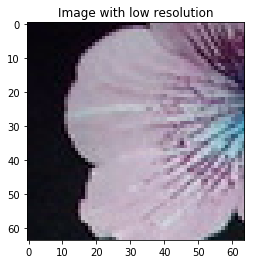

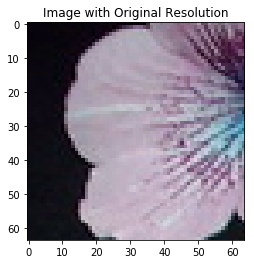

In [6]:
#get img and label
mock_im,mock_label = data_set['val',25]
plt.figure()
plt.title("Image with low resolution")
plt.imshow(mock_im)
plt.figure()
plt.title("Image with Original Resolution")
_ = plt.imshow(mock_label)

In [7]:
#get batches into a tensor - 2patches
mock_im_tensor,mock_label_tensor = data_set['val',25:27] #2 
print(mock_im_tensor.shape)
print(mock_label_tensor.shape)

(2, 64, 64, 3)
(2, 64, 64, 3)


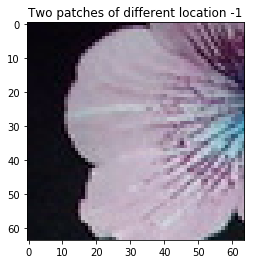

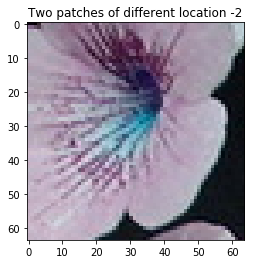

In [8]:
#two different patches

_ = plt.figure()
plt.title("Two patches of different location -1")
plt.imshow(mock_im_tensor[0,])
_ = plt.figure()
plt.title("Two patches of different location -2")
plt.imshow(mock_im_tensor[1,])

In [9]:
print(data_set.group_level)
print(data_set.size('train'))
print(data_set.size('val'))

0
25714
2532


In [10]:
args_recover = {}
args_recover['database_name'] = 'mock'
args_recover['export_dir'] = 'export'
args_recover['readonly'] = True
data_recover = Database(**args_recover)

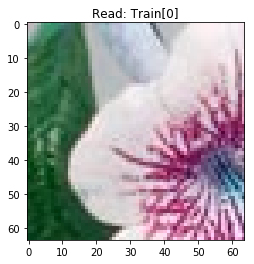

In [11]:
_ = plt.figure()
mock_recover = data_recover['train',0]
plt.title("Read: Train[0]")
plt.imshow(mock_recover[0])